In [1]:
import keras
import os
import pickle
import cv2 as cv2
from params import get_params
from sklearn import preprocessing
import sklearn.preprocessing
import numpy as np
from os import walk
import matplotlib.pyplot as plt
from build_database import build_database
from PIL import Image, ImageOps;
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

Using TensorFlow backend.


In [2]:
descriptors = pickle.load(open("descriptor.p", "rb"))

In [3]:
descriptors2 = pickle.load(open("descriptor2.p", "rb"))

In [4]:
descriptors3 = pickle.load(open("descriptor3.p", "rb"))

In [5]:
imagen = pickle.load(open("imagen.p", "rb"))

In [6]:
imagen2 = pickle.load(open("imagen2.p", "rb"))

In [7]:
imagen3 = pickle.load(open("imagen3.p", "rb"))

In [8]:
descriptors_val=np.reshape(descriptors,(477,4096))

In [9]:
descriptors_train=np.reshape(descriptors3,(1194,4096))

In [10]:
x_val_normalized = sklearn.preprocessing.normalize(descriptors_val, norm='l2', axis=1, copy=True, return_norm=False)

In [11]:
x_train_normalized = sklearn.preprocessing.normalize(descriptors_train, norm='l2', axis=1, copy=True, return_norm=False)

In [12]:
x_train_normalized= x_train_normalized.transpose()

In [13]:
Last = np.matmul(x_val_normalized,x_train_normalized,out = None)

In [14]:
ranks = np.argsort(Last,axis = 1)[:,::-1]

In [15]:
x_val_images = []
for ol in range(477):   
    
    x_val_images.append(np.array(imagen[ol]))
    

In [16]:
x_train_images = []

for oil in range(1194):   
    
    x_train_images.append(np.array(imagen3[oil]))

In [17]:
from PIL import Image, ImageOps;
# get the original images for visualization
# x_test_normalized = np.empty((717,4096))
h,w = (224, 224)
new_image= Image.new('RGB', (h*5,w*13))

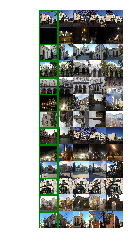

In [18]:
# Visualize ranks of the 10 queries
offset = 20 # it will show results from query #'offset' to #offset+10
for q in range(13):
    ranks_q = ranks[q*(offset+1),:]
  
    for i in range(4):
        new_image.paste( Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q ))

  # visualize query
    ima_q = Image.fromarray(x_val_images[q*(offset+1)])
    ima_q = ImageOps.expand(ima_q, border=20, fill='green')
    new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()